# Heat wave frequency experiment 

This code creates multiples class instances of ``LocSimulation``, see LocSimulation.py in ``../src/`` directory for full code. The only real thing to be added by a user is to continue adding to the ``master_dict`` dictionary containing model parameters. 

The code creates time series of temperature and moisture which are forced with daily mean dew point temperature, daily mean radiative forcing, and precipitation. From these time series, the daily maximum temperatures are taken.

The way we measure heat wave frequency is the following. The code creates multiple different time series with different mean dew point temperatures. (The dew point increases to a maximum of $\bar{T}_{d} + 5$ K.) We measure the 95th percentile for the baseline simulation, which is defined as the simulation with the *current* mean dew point temperature. We then compute how many times the daily maximum temperature in each other simulation (with the higher dew point temperatures) exceed the baseline 95th percentile. We also measure the mean $\mathcal{Z}$ value as the dew point temperature increases. 

The final plots are mean $\mathcal{Z}$ against the percentage of days that exceed the baseline 95th percentile. This hopefully will show the frequency of heat waves as we increased $T_d$ increases.

In [16]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

In [2]:
import sys
sys.path.append("/data/keeling/a/adammb4/heatwaves-physics/src/")
from LocSimulation import * 

In [3]:
# make nested dictionary with model parameters
# model params are estimated by fitting SMACM to ERA5 land data
# forcing params are taken using ERA5 data

SGP_dict = {'alpha_s': 4, 'alpha_r': 8, 'nu': 0.03, 'mu': 40, 'm_0': 0.1, 'F_mean': 226.96, 'F_std': 44.53, 'Td_mean': 291.55, 'Td_std': 2.75, 'omega': 3.5, 'p0': 0.1, 'p_scale': 0.5}
Witchita_dict = {'alpha_s': 4, 'alpha_r': 7, 'nu': 0.02, 'mu': 40, 'm_0': 0.2, 'F_mean': 226.44, 'F_std': 47.42, 'Td_mean': 291.29, 'Td_std': 2.92, 'omega': 3.5, 'p0': 0.1, 'p_scale': 0.5}
Dallas_dict = {'alpha_s': 4, 'alpha_r': 7, 'nu': 0.018, 'mu': 38, 'm_0': 0.3, 'F_mean': 226.84, 'F_std': 42.69, 'Td_mean': 293.42, 'Td_std': 2.21, 'omega': 3.5, 'p0': 0.1, 'p_scale': 0.5}
NY_dict = {'alpha_s': 2, 'alpha_r': 7, 'nu': 0.013, 'mu': 38, 'm_0': 0.72, 'F_mean': 216.44, 'F_std': 67.10, 'Td_mean': 290.82, 'Td_std': 3.51, 'omega': 3.5, 'p0': 0.1, 'p_scale': 0.5}

loc_param_dict = {'SGP': SGP_dict, 'Witchita': Witchita_dict, 'Dallas': Dallas_dict, 'NY': NY_dict}

In [4]:
SGP = LocSimulation(loc_param_dict['SGP'], 10, 6)
SGP.makeModelForcings()
SGP.makeForcedTimeSeries()
SGP.makeExceedences()

Getting ready...
Hold on...
One more thing...
Location Simulation object ready!
Making model forcings...
Finished!
Creating time series... (this could take a bit of time)
Finished!
Calculating the daily maximum temperatures in our simulation...
Finnished!
Calculating the daily mean temperature and soil moisture...
Finished!
Calculating how many times the daily maximum temperature in each simulation exceeded the 95th percentile of the baseline simulation...
Finished!


In [5]:
Witchita = LocSimulation(loc_param_dict['Witchita'], 10, 6)
Witchita.makeModelForcings()
Witchita.makeForcedTimeSeries()
Witchita.makeExceedences()

Getting ready...
Hold on...
One more thing...
Location Simulation object ready!
Making model forcings...
Finished!
Creating time series... (this could take a bit of time)
Finished!
Calculating the daily maximum temperatures in our simulation...
Finnished!
Calculating the daily mean temperature and soil moisture...
Finished!
Calculating how many times the daily maximum temperature in each simulation exceeded the 95th percentile of the baseline simulation...
Finished!


In [6]:
Dallas = LocSimulation(loc_param_dict['Dallas'], 10, 6)
Dallas.makeModelForcings()
Dallas.makeForcedTimeSeries()
Dallas.makeExceedences()

Getting ready...
Hold on...
One more thing...
Location Simulation object ready!
Making model forcings...
Finished!
Creating time series... (this could take a bit of time)
Finished!
Calculating the daily maximum temperatures in our simulation...
Finnished!
Calculating the daily mean temperature and soil moisture...
Finished!
Calculating how many times the daily maximum temperature in each simulation exceeded the 95th percentile of the baseline simulation...
Finished!


In [7]:
NY = LocSimulation(loc_param_dict['NY'], 10, 6)
NY.makeModelForcings()
NY.makeForcedTimeSeries()
NY.makeExceedences()

Getting ready...
Hold on...
One more thing...
Location Simulation object ready!
Making model forcings...
Finished!
Creating time series... (this could take a bit of time)
Finished!
Calculating the daily maximum temperatures in our simulation...
Finnished!
Calculating the daily mean temperature and soil moisture...
Finished!
Calculating how many times the daily maximum temperature in each simulation exceeded the 95th percentile of the baseline simulation...
Finished!


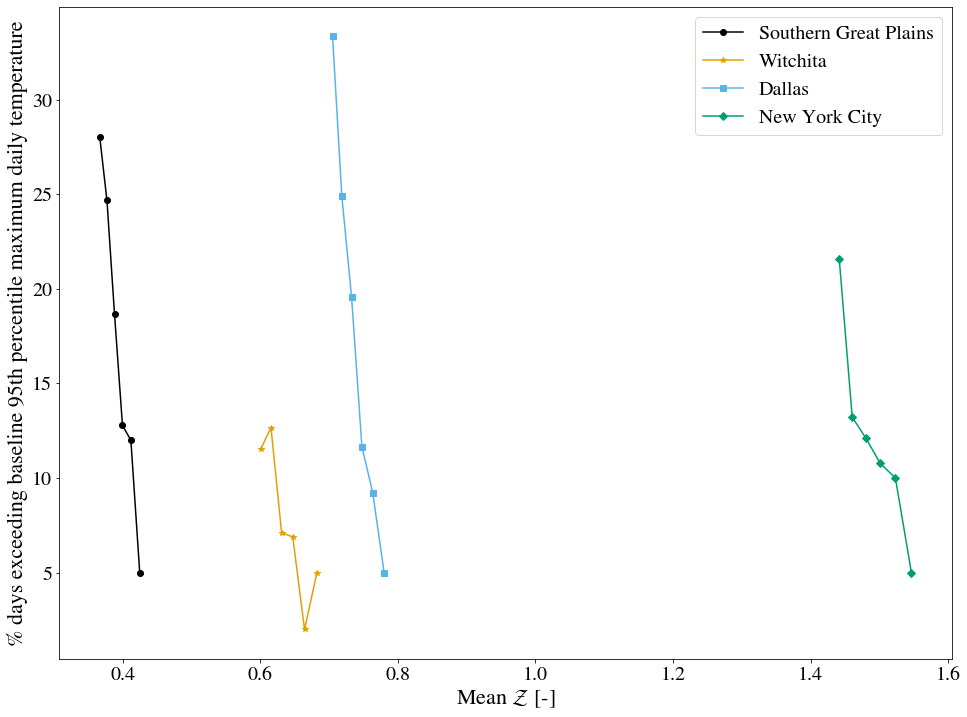

In [18]:
# make plot 
color_list = ['#000000', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7']
marker_list = ['o', '*', 's', 'D', '^', 'P']
fontsize = 22
labelsize = 20
figsize = (16, 12)

fig, ax = plt.subplots(1, figsize=figsize)

ax.plot(SGP.Z_means, SGP.Tmax_exceedences, marker=marker_list[0], color=color_list[0], label="Southern Great Plains")
ax.plot(Witchita.Z_means, Witchita.Tmax_exceedences, marker=marker_list[1], color=color_list[1], label="Witchita")
ax.plot(Dallas.Z_means, Dallas.Tmax_exceedences, marker=marker_list[2], color=color_list[2], label="Dallas")
ax.plot(NY.Z_means, NY.Tmax_exceedences, marker=marker_list[3], color=color_list[3], label="New York City")
ax.legend(fontsize=labelsize)

ax.tick_params(axis='both', labelsize=labelsize)
ax.set_xlabel("Mean $\mathcal{Z}$ [-]", fontsize=fontsize)
ax.set_ylabel("% days exceeding baseline 95th percentile maximum daily temperature", fontsize=fontsize)

fig.savefig("./figures/1-31-2022-heatwavefreq-10sumTmax.png", dpi=400)
fig.savefig("../docs/figdump/1-31-2022-heatwavefreq-10sumTmax.png", dpi=400)

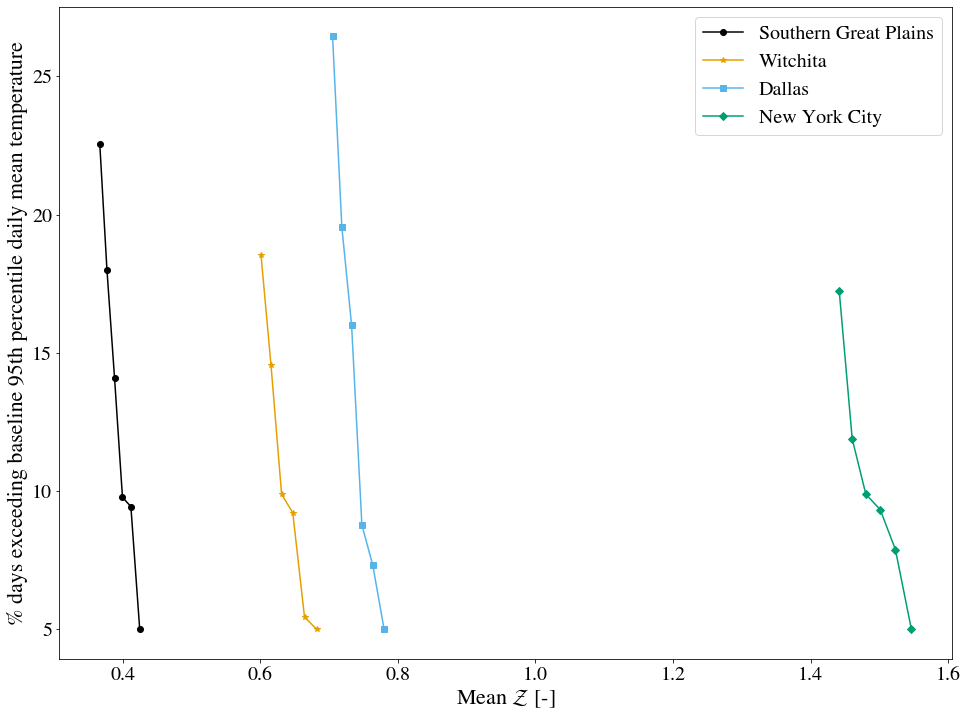

In [19]:
fig, ax = plt.subplots(1, figsize=figsize)

ax.plot(SGP.Z_means, SGP.Tdaily_exceedences, marker=marker_list[0], color=color_list[0], label="Southern Great Plains")
ax.plot(Witchita.Z_means, Witchita.Tdaily_exceedences, marker=marker_list[1], color=color_list[1], label="Witchita")
ax.plot(Dallas.Z_means, Dallas.Tdaily_exceedences, marker=marker_list[2], color=color_list[2], label="Dallas")
ax.plot(NY.Z_means, NY.Tdaily_exceedences, marker=marker_list[3], color=color_list[3], label="New York City")
ax.legend(fontsize=labelsize)

ax.tick_params(axis='both', labelsize=labelsize)
ax.set_xlabel("Mean $\mathcal{Z}$ [-]", fontsize=fontsize)
ax.set_ylabel("% days exceeding baseline 95th percentile daily mean temperature", fontsize=fontsize)

fig.savefig("./figures/1-31-2022-heatwavefreq-10sumTdaily.png", dpi=400)
fig.savefig("../docs/figdump/1-31-2022-heatwavefreq-10sumTdaily.png", dpi=400)

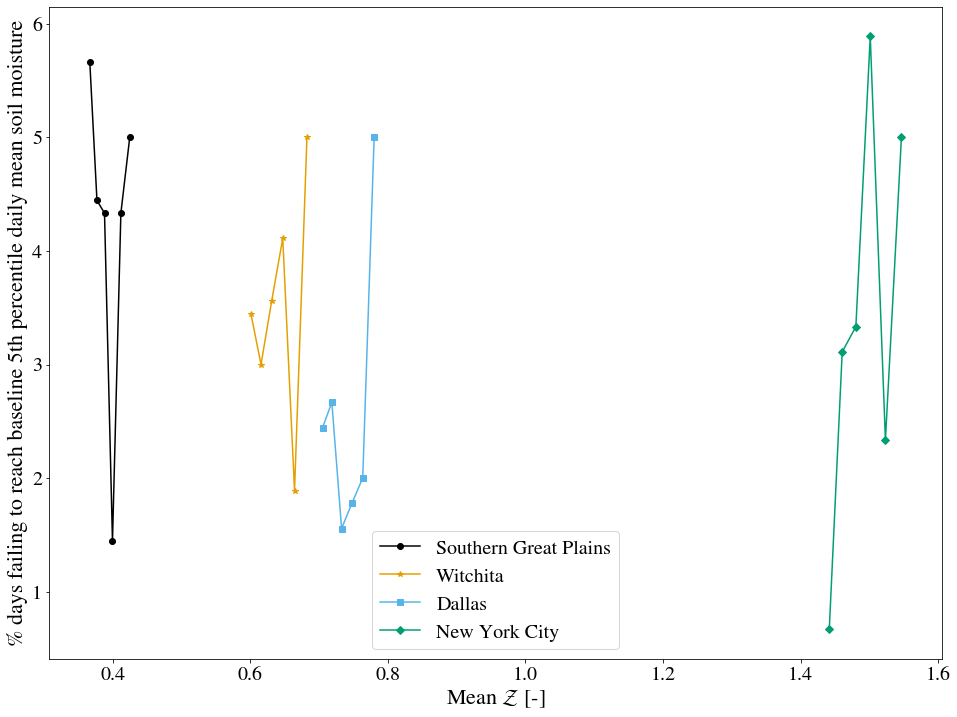

In [20]:
fig, ax = plt.subplots(1, figsize=figsize)

ax.plot(SGP.Z_means, SGP.mdaily_exceedences, marker=marker_list[0], color=color_list[0], label="Southern Great Plains")
ax.plot(Witchita.Z_means, Witchita.mdaily_exceedences, marker=marker_list[1], color=color_list[1], label="Witchita")
ax.plot(Dallas.Z_means, Dallas.mdaily_exceedences, marker=marker_list[2], color=color_list[2], label="Dallas")
ax.plot(NY.Z_means, NY.mdaily_exceedences, marker=marker_list[3], color=color_list[3], label="New York City")
ax.legend(fontsize=labelsize)

ax.tick_params(axis='both', labelsize=labelsize)
ax.set_xlabel("Mean $\mathcal{Z}$ [-]", fontsize=fontsize)
ax.set_ylabel("% days failing to reach baseline 5th percentile daily mean soil moisture", fontsize=fontsize)

fig.savefig("./figures/1-31-2022-heatwavefreq-10summdaily.png", dpi=400)
fig.savefig("../docs/figdump/1-31-2022-heatwavefreq-10summdaily.png", dpi=400)

In [ ]:
fig, ax = plt.subplots(6, figsize=figsize)

for i in range(0, 6):
    ax[i].plot(SGP.P_ts[i, :])
    ax[i].plot(Witchita.P_ts[i, :])

In [ ]:
def getDailyMeans(data, simulations, days):
    daily_means = np.zeros((simulations, days))
    for simulation in range(0, simulations):
            for day in range(0, days):
                daily_means[simulation, day] = np.mean(data[simulation, int(day * 86400):int((day + 1) * 86400)])
    return daily_means

def getSMExceedences(locclass):
    percent_exceedences = np.zeros(locclass.N_simulations)
    sm_dailymean = getDailyMeans(locclass.m_ts, locclass.N_simulations, locclass.N_days)
    baseline_M = np.percentile(locclass.m_ts[0, :], 5)
    print(baseline_M)
    for simulation in range(0, locclass.N_simulations):
        tmp_exceedence_indices = np.where(sm_dailymean[simulation, :] < baseline_M) # gives indexes of exceedences 
        tmp_N_exceedences = np.shape(tmp_exceedence_indices)[1]
        tmp_percent_exceedences = tmp_N_exceedences * locclass.N_days**(-1) * 100
        percent_exceedences[simulation] = tmp_percent_exceedences
    return percent_exceedences

def getTMExceedences(locclass):
    percent_exceedences = np.zeros(locclass.N_simulations)
    T_dailymean = getDailyMeans(locclass.T_ts, locclass.N_simulations, locclass.N_days)
    baseline_T = np.percentile(locclass.T_ts[0, :], 95)
    print(baseline_T)
    for simulation in range(0, locclass.N_simulations):
        tmp_exceedence_indices = np.where(T_dailymean[simulation, :] > baseline_T) # gives indexes of exceedences 
        tmp_N_exceedences = np.shape(tmp_exceedence_indices)[1]
        tmp_percent_exceedences = tmp_N_exceedences * locclass.N_days**(-1) * 100
        percent_exceedences[simulation] = tmp_percent_exceedences
    return percent_exceedences


In [ ]:
sgp_sm_dryness = getSMExceedences(SGP)
t_dm_exceed  = getTMExceedences(SGP)
wt_dm_exceed = getTMExceedences(Witchita)
dat_dm_exceed = getTMExceedences(Dallas)
nyt_dm_exceed = getTMExceedences(NY)

In [ ]:
fig, ax = plt.subplots(1, figsize=figsize)

ax.plot(SGP.Z_means, t_dm_exceed, marker=marker_list[0], color=color_list[0], label="Southern Great Plains")
ax.plot(Witchita.Z_means, wt_dm_exceed, marker=marker_list[1], color=color_list[1], label="Witchita")
ax.plot(Dallas.Z_means, dat_dm_exceed, marker=marker_list[2], color=color_list[2], label="Dallas")
ax.plot(NY.Z_means, nyt_dm_exceed, marker=marker_list[3], color=color_list[3], label="New York City")
ax.legend(fontsize=labelsize)

ax.tick_params(axis='both', labelsize=labelsize)
ax.set_xlabel("Mean $\mathcal{Z}$ [-]", fontsize=fontsize)
ax.set_ylabel("% days exceeding baseline maximum daily temperature", fontsize=fontsize)

#fig.savefig("./figures/1-31-2022-heatwavefreq.png", dpi=400)
#fig.savefig("../docs/figdump/1-31-2022-heatwavefreq.png", dpi=400)